# Dengue Case Count Prediction


## Done By
### Ronak Sankaranarayanan
### Sitanshu Rupani
### Sidhi Patil

### Introduction

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.
<br/><br/>
Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.
<br/><br/>
In recent years dengue fever has been spreading. Historically, the disease has been most prevalent in Southeast Asia and the Pacific islands. These days many of the nearly half billion cases per year are occurring in Latin America:
<br/><br/>
In our project, we aim to build a Regression model to be able to predict the number of dengue cases occuring in  a week, using environmental indicators for 2 cities with data spanning 20 years.
<br/><br/>
We believe that this is an important problem to solve as it can help developing countries allocate resources accurately and be prepared to fight this disease properly






















The Dataset has been taken from  [kaggle site](https://www.kaggle.com/qcnguyen/dengai-predicting-disease-spread)

The competition based on the data is hosted in [DRIVENDATA](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

# Data Collection/Processing: 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# setting maximum columns to display all the columns in result
pd.set_option('display.max_columns', None)

The dataset 'dengue_features_train.csv' consists entries for only 2 cities - San Juan(sj) and Iquitos(iq) from 1990 to 2010. It includes various features such as city name, week, weather station measurements(variables prefixed with station), precipitation measurements, climate forecast system reanalysis measurements(variables prefixed with reanalysis) and normalized difference vegetation index(variable prefixed with ndvi).
Other dataset 'dengue_labels_train.csv' has number of dengue cases reported for these cities in different weeks.

**Brief Dataset Features Description :** <br>
city – City abbreviations: sj for San Juan and iq for Iquitos <br>
precipitation_amt_mm – Total precipitation <br>
NOAA's GHCN daily climate data weather station measurements : <br>
    station_max_temp_c – Maximum temperature <br>
    station_min_temp_c – Minimum temperature <br>
    station_avg_temp_c – Average temperature <br>
    station_precip_mm – Total precipitation <br>
    station_diur_temp_rng_c – Diurnal temperature range <br>
NOAA's NCEP Climate Forecast System Reanalysis measurements : <br>
    reanalysis_sat_precip_amt_mm – Total precipitation <br>
    reanalysis_dew_point_temp_k – Mean dew point temperature <br>
    reanalysis_air_temp_k – Mean air temperature <br>
    reanalysis_relative_humidity_percent – Mean relative humidity <br>
    reanalysis_specific_humidity_g_per_kg – Mean specific humidity <br>
    reanalysis_precip_amt_kg_per_m2 – Total precipitation <br>
    reanalysis_max_air_temp_k – Maximum air temperature <br>
    reanalysis_min_air_temp_k – Minimum air temperature <br>
    reanalysis_avg_temp_k – Average air temperature <br>
    reanalysis_tdtr_k – Diurnal temperature range <br>
Satellite vegetation - Normalized difference vegetation index: <br>
    ndvi_se – Pixel southeast of city centroid <br>
    ndvi_sw – Pixel southwest of city centroid <br>
    ndvi_ne – Pixel northeast of city centroid <br>
    ndvi_nw – Pixel northwest of city centroid

In [2]:
# importing data consisting of 24 columns
dengue_features_df = pd.read_csv("dengue_features_train.csv")
# importing data consisting number of dengue cases reported for city in week
dengue_labels_df = pd.read_csv("dengue_labels_train.csv")

In [3]:
# displaying columns and its number of non-null entries
dengue_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [4]:
# displaying columns and its number of non-null entries
dengue_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


All entries(1456) have non-null total number of cases. And for other features in dataset, the number of missing values is not large except for the feature 'ndvi_ne'.

In [5]:
# joining two datasets
final_df = dengue_features_df.merge(dengue_labels_df, how='inner', on=["city", "year", "weekofyear"])

In [6]:
# looking at data
final_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [7]:
#Fill null data with mean of columns
final_df.fillna(final_df.mean(), inplace=True)

# Data Exploration: Exploring the your data

**plot some properties/statistics/distribution of your data** 

In [9]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

In [10]:
# statistical summary of dataset
final_df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.130827,0.117835,0.073299,0.083266,43.519806,1.357730,1.257372,1.522551,3.223466,2.556533,43.284882,7.129271,43.519806,1.537184,3.534237,1.273108,2.096879,1.945806,1.566475,47.095179,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.055625,0.051367,0.155625,0.144718,9.960000,297.665000,298.264286,294.130357,301.000000,293.900000,13.200000,77.226429,9.960000,15.561429,2.328571,26.328571,6.528571,31.100000,21.100000,8.850000,5.000000
50%,2002.000000,26.500000,0.142294,0.128067,0.196998,0.190993,38.710000,298.662143,299.267857,295.625714,302.500000,296.200000,27.370000,80.369286,38.710000,17.065000,2.864286,27.385714,7.385714,32.800000,22.200000,24.450000,12.000000
75%,2005.000000,39.250000,0.229292,0.212325,0.247021,0.246082,70.047500,299.827500,300.207143,296.456071,305.500000,297.900000,52.042500,86.041429,70.047500,17.974643,7.553571,28.128571,9.500000,33.900000,23.300000,53.600000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


**Distribution of Total Number of cases**

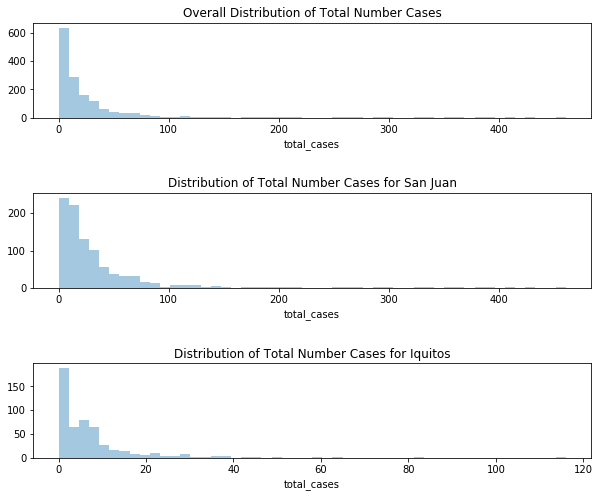

In [11]:
# histogram of total number of cases
fig,axs = plt.subplots(3,1,figsize = (10,8)) 
axs[0].set_title('Overall Distribution of Total Number Cases')
sns.distplot(final_df['total_cases'], kde=False, ax=axs[0])
# total cases distribution for city San Juan(sj)
axs[1].set_title('Distribution of Total Number Cases for San Juan')
sns.distplot(final_df[final_df['city']=='sj']['total_cases'], kde=False, ax=axs[1])
# total cases distribution for city and Iquitos(iq)
axs[2].set_title('Distribution of Total Number Cases for Iquitos')
sns.distplot(final_df[final_df['city']=='iq']['total_cases'], kde=False, ax=axs[2])
# adding space in between of plots
plt.subplots_adjust(hspace = 0.8)

From above distribution of total number of cases, it can be seen that the distribution is skewed - there are only a few occurrences where the number of cases is greater than 100. 

**Checking number of records available for both cities in each year -**

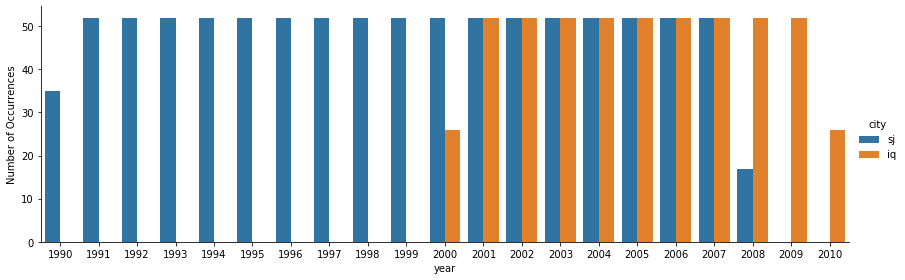

In [12]:
# checking number of entries for both cities(sj and iq) in all years
year_city_count = final_df.groupby(['year','city']).size().to_frame('Number of Occurrences').reset_index()
sns.catplot(x = 'year', y ='Number of Occurrences', hue = 'city', data=year_city_count, kind='bar', height=4, aspect=3)

One year has around 52 weeks. For years 1991-2007, entries for all weeks are available for San Juan city whereas for other city Iquitos entries for all weeks are available from years 2001-2009. No data available for Iquitos for years 1990-2000.

**Average Number of cases over the years in both cities**

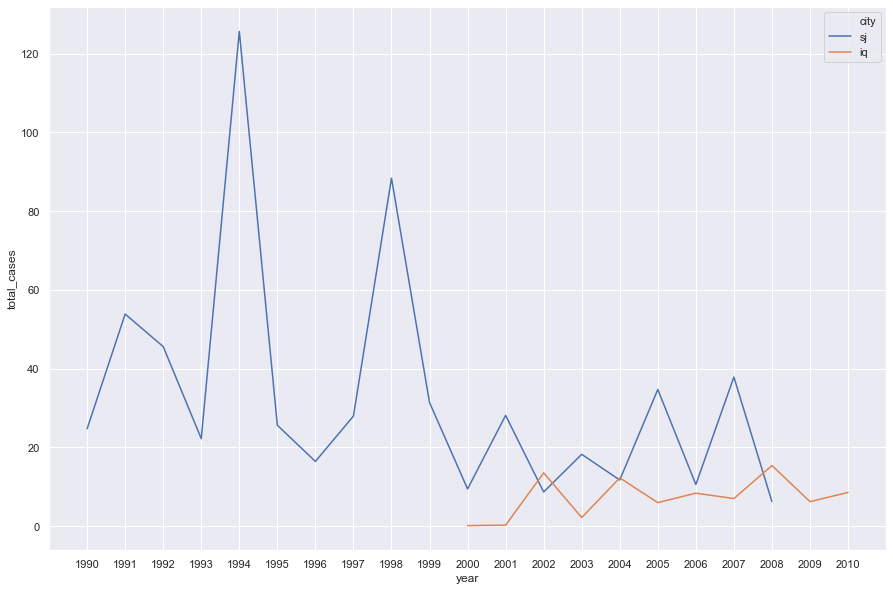

In [13]:
df = final_df.groupby(['year','city'],as_index=False).agg({"total_cases": "mean"})
# setting figure size
sns.set(rc={'figure.figsize':(15,10)})
g = sns.lineplot(data=df, x='year', y='total_cases', hue='city')
# setting x-axis ticks
g.set_xticks(range(1990,2011))
g.set_xticklabels(range(1990,2011))
plt.show()

From the above graph, it is observed that San Juan city has greater average number of Dengue cases than Iquitos. Also, the number of cases in San Juan city is not showing large increase in cases as compared to 2000-2010.

**Total cases over weeks for both cities** -

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


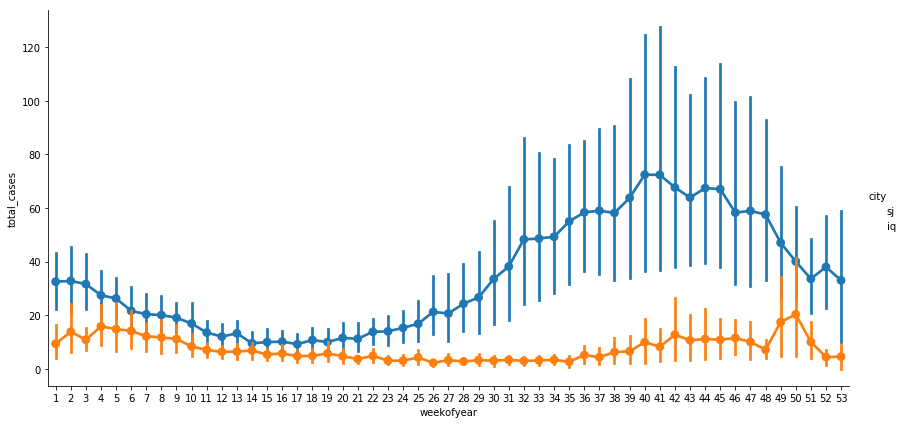

In [8]:
fig = sns.FacetGrid(final_df, hue='city', height=6, aspect=2) 
fig.map(sns.pointplot,'weekofyear','total_cases')
fig.add_legend()

**Exploring data for year 2007 for both cities separately**

In [9]:
# San Juan data in year 2007
sj_df_2007 = final_df.loc[(final_df['year']==2007) & (final_df['city']=='sj')]
# Iquitos data in year 2007
iq_df_2007 = final_df.loc[(final_df['year']==2007) & (final_df['city']=='iq')]

For San Juan City- 

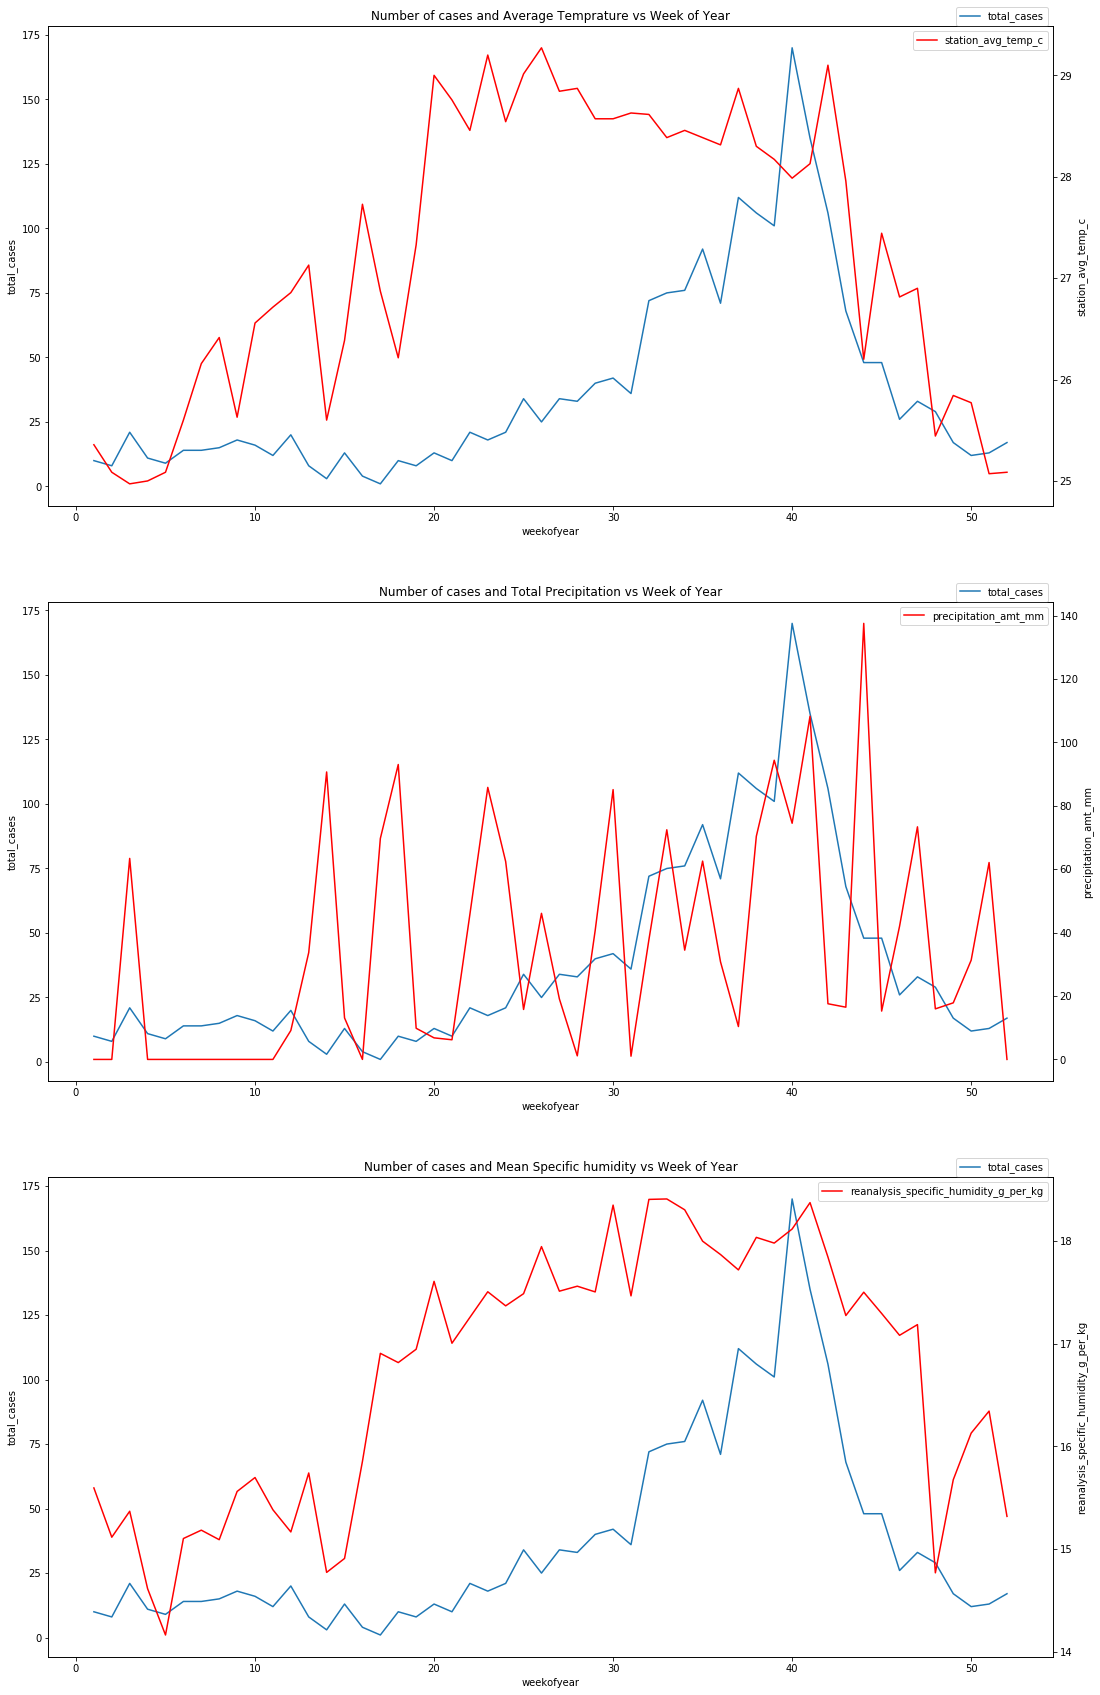

In [10]:
# plotting features for each week in 2007 for San Juan
fig, axs = plt.subplots(3,1,figsize=(18,30))
# Average Temperature
axs[0].set_title('Number of cases and Average Temprature vs Week of Year')
sns.lineplot(x= "weekofyear", y="total_cases", data = sj_df_2007, label='total_cases', ax = axs[0])
sns.lineplot(x = 'weekofyear', y = 'station_avg_temp_c', data = sj_df_2007, color='red', label='station_avg_temp_c', ax=axs[0].twinx())
axs[0].legend(bbox_to_anchor=(1, 1.05))
# Total Precipitation
axs[1].set_title('Number of cases and Total Precipitation vs Week of Year')
sns.lineplot(x= "weekofyear", y="total_cases", data = sj_df_2007, label='total_cases', ax = axs[1])
sns.lineplot(x = 'weekofyear', y = 'precipitation_amt_mm', data = sj_df_2007, color='red', label='precipitation_amt_mm', ax=axs[1].twinx())
axs[1].legend(bbox_to_anchor=(1, 1.05))
# Mean Specific humidity
axs[2].set_title('Number of cases and Mean Specific humidity vs Week of Year')
sns.lineplot(x="weekofyear", y="total_cases", data=sj_df_2007, label='total_cases', ax=axs[2])
sns.lineplot(x='weekofyear', y='reanalysis_specific_humidity_g_per_kg', data=sj_df_2007, color='red', label='reanalysis_specific_humidity_g_per_kg', ax=axs[2].twinx())
axs[2].legend(bbox_to_anchor=(1, 1.05))
# setting space between plots
plt.subplots_adjust(hspace = 0.2)
plt.show()

Looking at the above plots, weeks with more number of cases seem to have more average temperage and slight increase in precipitation. Humidity is randomly distributed over all weeks.

For Iquitos city -

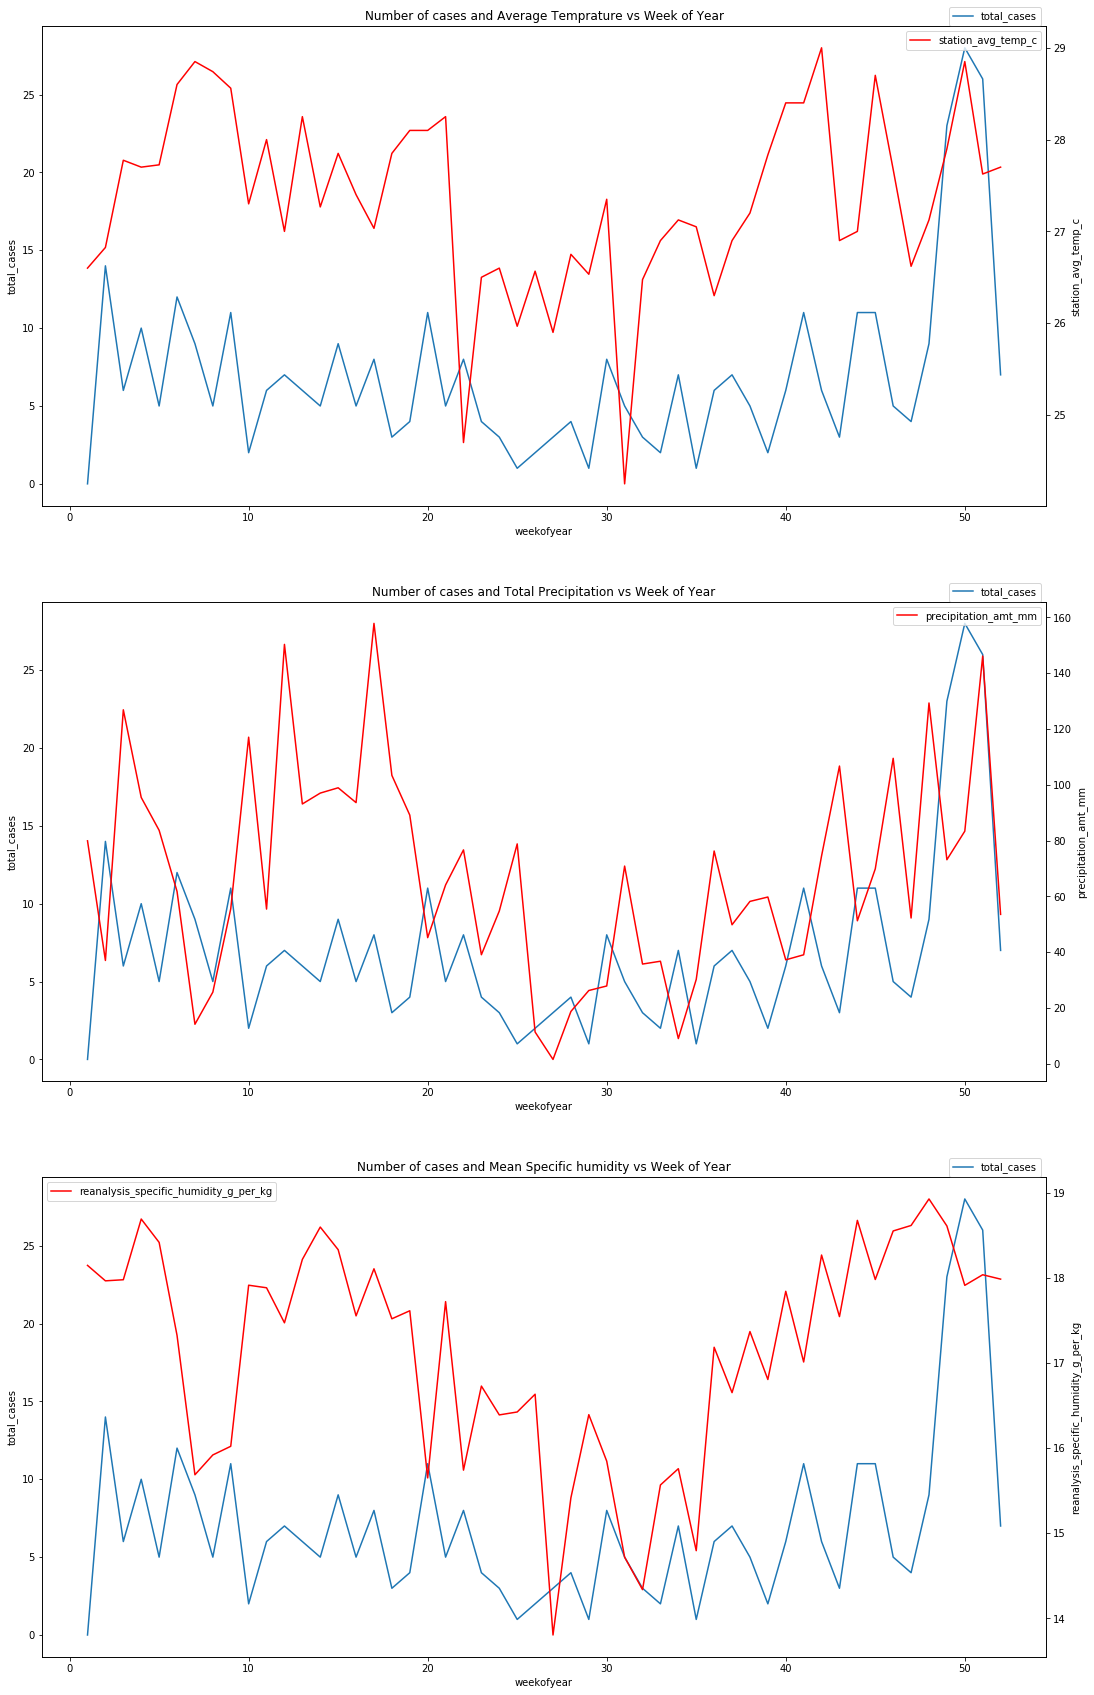

In [11]:
# plotting features for each week in 2007 for Iquitos
fig, axs = plt.subplots(3,1,figsize=(18,30))
# Average Temperature
axs[0].set_title('Number of cases and Average Temprature vs Week of Year')
sns.lineplot(x= "weekofyear", y="total_cases", data = iq_df_2007, label='total_cases', ax = axs[0])
sns.lineplot(x = 'weekofyear', y = 'station_avg_temp_c', data = iq_df_2007, color='red', label='station_avg_temp_c', ax=axs[0].twinx())
axs[0].legend(bbox_to_anchor=(1, 1.05))
# Total Precipitation
axs[1].set_title('Number of cases and Total Precipitation vs Week of Year')
sns.lineplot(x= "weekofyear", y="total_cases", data = iq_df_2007, label='total_cases', ax = axs[1])
sns.lineplot(x = 'weekofyear', y = 'precipitation_amt_mm', data = iq_df_2007, color='red', label='precipitation_amt_mm', ax=axs[1].twinx())
axs[1].legend(bbox_to_anchor=(1, 1.05))
# Mean Specific humidity
axs[2].set_title('Number of cases and Mean Specific humidity vs Week of Year')
sns.lineplot(x="weekofyear", y="total_cases", data=iq_df_2007, label='total_cases', ax=axs[2])
sns.lineplot(x='weekofyear', y='reanalysis_specific_humidity_g_per_kg', data=iq_df_2007, color='red', label='reanalysis_specific_humidity_g_per_kg', ax=axs[2].twinx())
axs[2].legend(bbox_to_anchor=(1, 1.05))
# setting space between plots
plt.subplots_adjust(hspace = 0.2)
plt.show()

Here, number of cases reported do not vary much with average temperature, humidity and preciptitation. But relatively large number of cases is observed during the last weeks where all three - temperature, humidity and preciptitation are comparatively higher.

**Finding correlations between features**

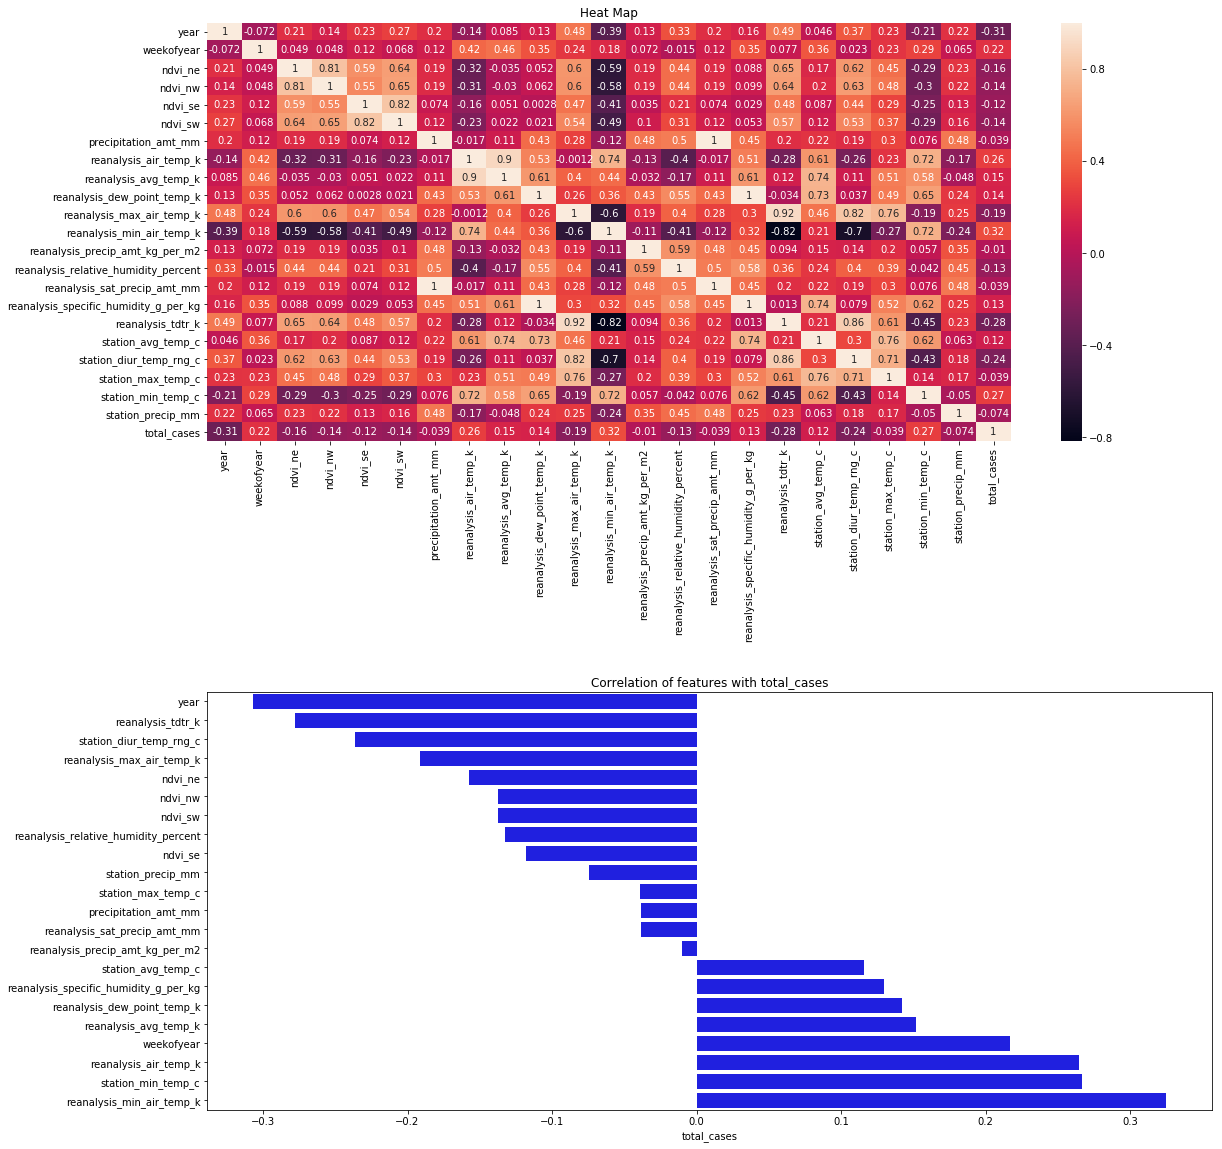

In [12]:
a = final_df.drop(columns=['city','week_start_date'],axis=1)
# computing correlation matrix
corr = a.corr()

fig, axs = plt.subplots(2,1, figsize=(18,20))

# visualizing heatmap
sns.heatmap(corr, annot=True, ax=axs[0])
axs[0].set_title('Heat Map')

# correlation with total cases
sorted_y = corr.sort_values(by='total_cases', axis=0).drop('total_cases')
sns.barplot(x=sorted_y.total_cases, y=sorted_y.index, color="b", ax=axs[1])
axs[1].set_title('Correlation of features with total_cases')
plt.subplots_adjust(hspace = 0.6)
plt.show()

Based on heatmap, total_cases seems to only have weak correlations with other variables. Looking closely at the heatmap, many of the climate variables such as ndvi variables, reanalysis variables, and station variables are much more strongly correlated among themselves.

For this problem, we have decided to use Lasso Regression to predict the number cases occuring on a particular week based on certain environmental factors.
<br/>
We carry out some preprocessing and feature engineering, before modelling.
* We one hot encode the city variable to create 2 binary variables to denote city(San Juan or Iquitos) where data is observed
* We also do the same for the weekofyear variable to better represent the week for which the data is being considered
* We standardize the data using StandardScalar since the data consists of varying magnitudes 
* We then run our lasso regression model and plot our errors


In [13]:
prepr_df = final_df[final_df['total_cases'] <= 200].reset_index()

In [14]:
prepr_df.head()

,index,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [15]:
prepr_df.drop(['week_start_date','index'], axis=1, inplace=True)

In [16]:
# one-hot encoding for city
city_dummy = pd.get_dummies(prepr_df['city'], prefix='City')

In [17]:
prepr_df.drop(['city'], axis=1, inplace=True)

In [18]:
prepr_df = pd.concat([ city_dummy,prepr_df], axis=1)

In [19]:
# one-hot encoding for week of year
week_dummy = pd.get_dummies(prepr_df['weekofyear'], prefix='Week_No', drop_first=True)

In [20]:
prepr_df.drop(['weekofyear'], axis=1, inplace=True)
prepr_df = pd.concat([ week_dummy,prepr_df], axis=1)

In [21]:
prepr_df.drop(['year'], axis=1, inplace=True)

In [22]:
prepr_df.head()

,Week_No_2,Week_No_3,Week_No_4,Week_No_5,Week_No_6,Week_No_7,Week_No_8,Week_No_9,Week_No_10,Week_No_11,Week_No_12,Week_No_13,Week_No_14,Week_No_15,Week_No_16,Week_No_17,Week_No_18,Week_No_19,Week_No_20,Week_No_21,Week_No_22,Week_No_23,Week_No_24,Week_No_25,Week_No_26,Week_No_27,Week_No_28,Week_No_29,Week_No_30,Week_No_31,Week_No_32,Week_No_33,Week_No_34,Week_No_35,Week_No_36,Week_No_37,Week_No_38,Week_No_39,Week_No_40,Week_No_41,Week_No_42,Week_No_43,Week_No_44,Week_No_45,Week_No_46,Week_No_47,Week_No_48,Week_No_49,Week_No_50,Week_No_51,Week_No_52,Week_No_53,City_iq,City_sj,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [23]:
X = prepr_df.drop(['total_cases'],axis=1)
Y = prepr_df['total_cases'].values

In [24]:
# splitting dataset into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [25]:
scalar_train = StandardScaler()

In [26]:
# scaling data
X_train = scalar_train.fit_transform(X_train)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
scalar_test = StandardScaler()
X_test = scalar_test.fit_transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [29]:
# initializing Lasso model
lasso_reg = Lasso()

In [30]:
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
#Predicting for X_test
y_pred_lass = lasso_reg.predict(X_test)

In [32]:
mean_squared_error(Y_test, y_pred_lass)

646.1339436451569

In [33]:
(mean_squared_error(Y_test, y_pred_lass))**.5

25.419164888822703

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [34]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
coef = pd.DataFrame()
coef['features'] = X.iloc[:,:].columns
coef['coef'] = lasso_reg.coef_
coef['coef_abs'] = np.abs(lasso_reg.coef_)
coef.sort_values(by=['coef_abs'],ascending=False)

,features,coef,coef_abs
52,City_iq,-6.012399,6.012399
63,reanalysis_min_air_temp_k,2.322787,2.322787
67,reanalysis_specific_humidity_g_per_kg,1.824859,1.824859
15,Week_No_17,-0.922398,0.922398
48,Week_No_50,0.897929,0.897929
17,Week_No_19,-0.880098,0.880098
19,Week_No_21,-0.843305,0.843305
43,Week_No_45,0.791671,0.791671
18,Week_No_20,-0.791394,0.791394
22,Week_No_24,-0.729379,0.729379


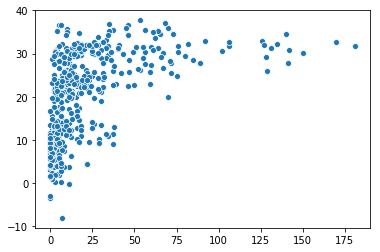

In [40]:
sns.scatterplot(x=Y_test,y=y_pred_lass)

We get an error of 25 using Lasso Regression.
<br/>
We also see that Minimum Air Temperature and Humidity are two very important factors towards spread of Dengue.
<br/>
With more regular environmental readings and more granular and expansive data, this work can be fine tuned and perfected to help governments around the world combat against this disease